# Berechnung zur Ermittlung des Wärmestroms von Widerständen in Umgebung

In [4]:
#import der nötigen Libraries
import matplotlib.pyplot as plt
from math import *
import numpy as np
from IPython import display
from sympy import *
import scipy.constants as const

## Rahmenbedingungen: 

1A UsB + 1A Display + 1A Horn + 1A Backlight + 1A Highbeam + 1A LowBeam = 6A 

Pnenn= 5x12W +1x5W= 65W

Anzahl der Belasteten Widerstände: 6x Arcol HS50



## Fragestellungen

Ziel: Abführen der 65W Wärmeleistung über den Pfad: Widerstände/Haltplatte/Grundplatte/Freie Konvektion/Strahlung

Wie groß ist der Wärmeübergang Grundplatte zu Luft?

Welche Strömungsart herscht? 

Wie hoch ist der Anteil der Strahlung? 



## Modellbeschreibung

Die auf dem Aluwinkel montierten Widerstände haben eine Verlustleistung von 65W. Diese muss über Wärmeleitung/Konvektion und Strahlung an die Umgebung abgeführt werden. 

Der Aluwinkel und die Grundplatte stellt also ein Kühlkörper dar, welcher nun auf ausreichende Wirkung überprüft wird. 
Die Aluminiumkörper werden mit dem Modell der "ebenen Platte - Freie Konvektion" angenähert. 

Differenztemperatur wird des Modells wird erhöht bis sich ein Wärmestrom von 65W ergibt. 
Berechnung wird dann mit Messung verglichen. 

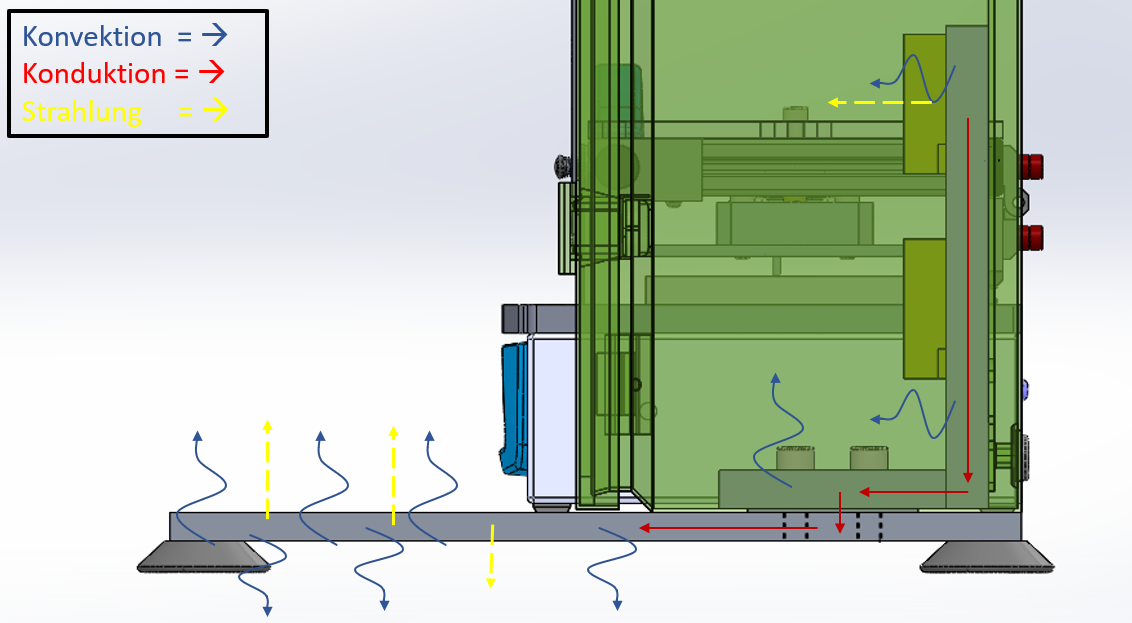

In [5]:
display.Image("https://raw.githubusercontent.com/flauhoff/Jupyter_test/main/Schema_W%C3%A4rmedurchgang.png")

In [25]:
#display.Image("https://raw.githubusercontent.com/flauhoff/Jupyter_test/main/TemperatureRise_ArcolHS50.png")

In [7]:
#display.Image("https://raw.githubusercontent.com/flauhoff/Jupyter_test/main/Anordnung_Widerst%C3%A4nde.png")


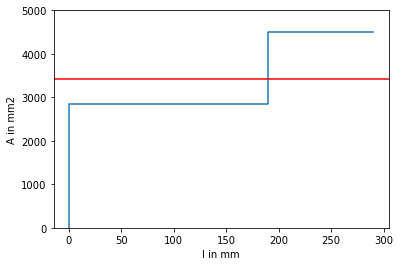

In [8]:
#Ermittlung der mittleren Querschnitte der Wärmeleitung


A=[0,2850, 2850, 2850, 4500, 4500]

l_v= [0,0, 140, 190, 190, 290]
plt.plot(l_v,A)
plt.xlabel('l in mm')
plt.ylabel('A in mm2')
plt.ylim([0, 5000])

plt.axhline(y=3418, color='r', linestyle='-')

dt=1

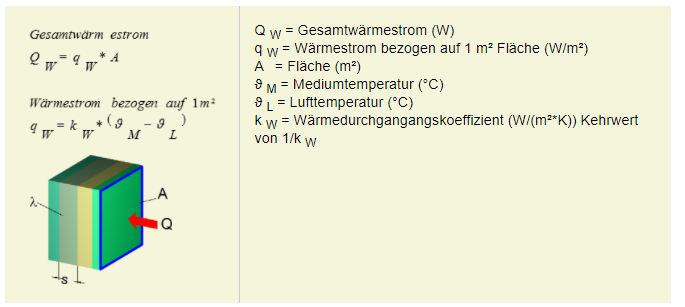

In [9]:
display.Image("https://raw.githubusercontent.com/flauhoff/Jupyter_test/main/Gesamtw%C3%A4rmestrom.png")

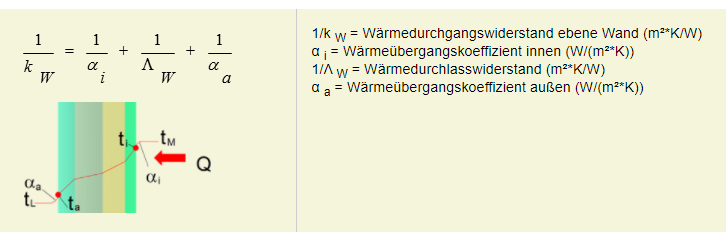

In [10]:
display.Image("https://raw.githubusercontent.com/flauhoff/Jupyter_test/main/W%C3%A4rmedurchlass.png")

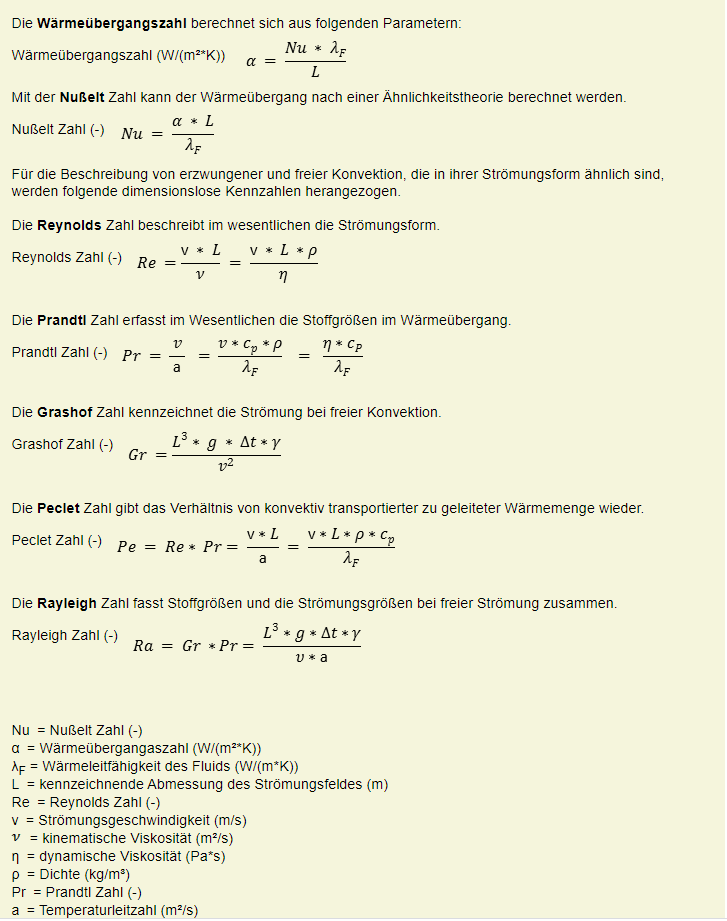

In [11]:
display.Image("https://raw.githubusercontent.com/flauhoff/Jupyter_test/main/Kennzahlen.png")

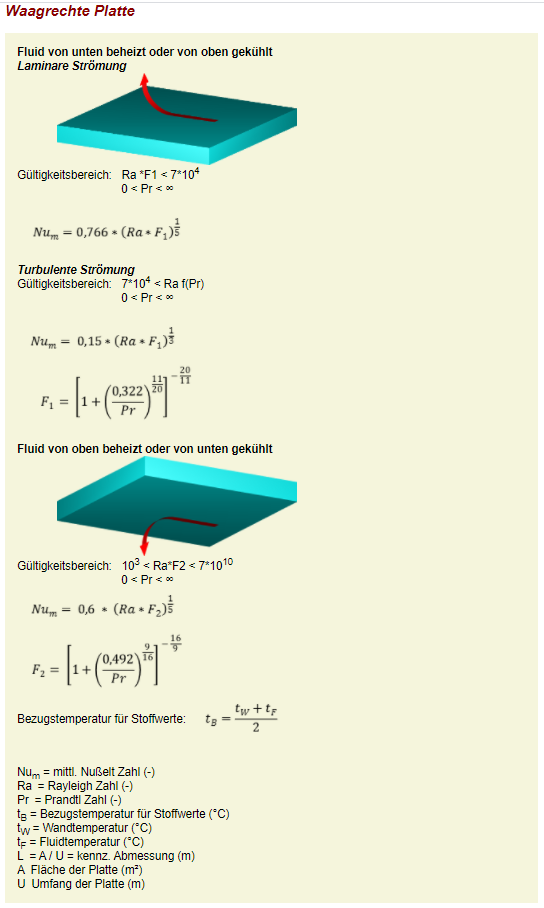

In [12]:
display.Image("https://raw.githubusercontent.com/flauhoff/Jupyter_test/main/Anstr%C3%B6mung_waagerechtePlatte.png") 

Wärmestrom der Strahlung: Q_s= 19.45 [W]
Gesamtwärmestrom= 65.38 [W]
alpha= 5.764986601821225 [W/m2*k]
Differenztemperatur= 49 [K]


Text(0, 0.5, 'Differenztemperatur in Kelvin')

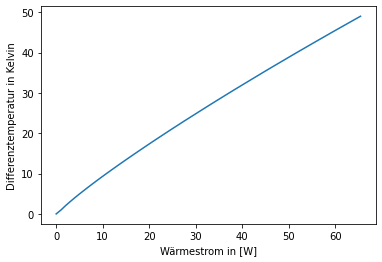

In [27]:
#Ebene Platte, Fluid von unten beheizt

#Variablen initialiseriung
Pnenn= 65#W]
dt= 1 # Differenztemperatur in Kelvin
Qw=0   # Wärmestrom, Konvektion, Konduktion
Qges=np.array([0]) # array für Gesamtwärmestrom
dt_v= np.array([0])# array der Differenztemperatur
Q_s=0 # Wärmestrom Strahlung
ct=0 # Schleifenzähler

# Festlegen von Konstanten und Geometrischen Größen 
L= 0.6 # [m]Länge der Bodenplatte
g= 9.81 # [m/s2]
v_l= 153*pow(10,-7) # [m2/s] VDI Wärmeatlas, D2.2 Tabelle 1
cp= 1.007#[kJ/kg*K] von Luft @ 25°C
beta= 0.003674 # VDI Wärmeatlas, D2.2 Tabelle 10
yps= (3/2) * beta #beta & yps sind Ausehnungskoeffizienten
#a= 223.2 *pow(10,-7) # Temperaturleitzahl in [m2/s] VDI D2.2 Tabelle 15
lambda_klein= 135 # Wärmeleitfähigkeit Aluminium [W/m*K] 
l= 0.29   # [m], länge der Wärmeleitung

Pr= 0.7081 #Prandtlzahl VDI Wärmeatlas D2.2  Tabelle 1, dimesionslos

# iterative Berechnung des Wärmestrom, pro Schleifendurchgang Differenztemperatur +1Klevin
while Qges[len(Qges)-1]<Pnenn:     #Abbruch wenn Qges==65W
    ct= ct+1
    dt_v= np.append(dt_v,ct) # Differenztemperatur in [K]
    dt= dt_v[len(dt_v)-1]    #letzter, neuester Temperaturwert

    #Grashofzahl
    Gr= (pow(L,3)* 9.81* dt * (yps))/pow(v_l,2)  #dimesionslose Kennzahl
    #Rayleighzahl
    Ra= Gr*Pr #dimesionslose Kennzahl

    #F1 koeffizient
    F1_zw = 1+pow((0.322/Pr),11/20)  #dimesionslose Kennzahl
    F1= pow(F1_zw, -20/11)   #dimesionslose Kennzahl
 
    #Wärmeleitfähigkeit Luft
    lambda_l= 0.026 #W/mK VDI Wärmeatlas, D2.2 Tabelle 12
   

    if F1*Ra<(7*pow(10,-7)):
       #print('Strömung laminar - Nusseltkorrelation fürlaminare Strömung wählen')
        Nu=  0.766 *pow(Ra*F1,1/5)
    else:
        #print('Strömung turbulent - Nusseltkorrelation für Turbulente Strömung wählen ')
        Nu= 0.15 *pow(Ra*F1,1/3)

    #Wärmeübergangskoeffizient
    alpha= (Nu*lambda_l)/L #Wärmeübergangskoeffizient bestimmt
    #zum vergleich Tabellenwert bzw. Näherungswert= 5.6

    #Bestimmung des Wärmedurchlasswiderstand des Aluminiums
    lambda_groß= lambda_klein/l 


   
    A_2= 5912*pow(10,-6)*6 #Ob4erfläche der Widerstände
    A1= 3419* pow(10,-6) # Querschnittsfläche Wärmeleitung
    A2= 0.18 *2 + A_2  # Oberfläche freie Konvektion

    # Formel zum Wärmestrom aufgrund von Konvektion ausmultipliziert,
    #berückstigung der höheren Oberfläche Wärmeübertragung(alpha)
    Qw= 1/((1/(lambda_groß*A1)+(1/(alpha*A2)))) * dt 
 

    #Berechnung des Wärmestroms aufgrund von Strahlung 
    T1= dt+(273+22) # [K] Widerstandstemperatur
    T2= 22+272     # [K] Umgebungstemperatur

    sigma= const.Stefan_Boltzmann #Stefan-Boltzmannkonstante aus scipy library
    eps1= 0.049 # VDI Wärmeatlas K1 Tabelle 2, Aluminum Walzblank
    C12=eps1*sigma #[W/m4*K4] , elxiertes Alu= 0.9
    A_1= 0.6*0.3*2+0.3*0.2 #[m2], Bodenplatte + Platten im Schaltschrank
    
    eps2= 0.9# [W/m4*K4] 
    Q_s1= C12*A_1*(pow(T1,4)-pow(T2,4)) #[W] Strahlungsleistung der Widerstände
    Q_s2= eps2*sigma*A_2*(pow(T1,4)-pow(T2,4))# [W] #Strahlungsleistung der Platten 
    Q_s= Q_s1+Q_s2 # [W] Gesamtstrahlungsleistung
   
   
    
    
    
    Q_s=round(Q_s, 2)
    Qw= round(Qw,2)
    Qges=np.append(Qges, Q_s+ Qw) 
    
print('Wärmestrom der Strahlung: Q_s=',Q_s, '[W]')   
print('Gesamtwärmestrom=',  Qges[len(Qges)-1], '[W]')
print('alpha=',alpha, '[W/m2*k]')   
print('Differenztemperatur=',dt,'[K]')
plt.plot(Qges,dt_v)
plt.xlabel('Wärmestrom in [W]')
plt.ylabel('Differenztemperatur in Kelvin')

## Berechnung aufgenommen Wärme durch therm. Kapazitäten

In [14]:
m_g= (600*300*10+ 290*150*16 +70*290*15)*(2.7*pow(10, -6)) # Masse der Wärmeleiter in kg
print('Masse=', m_g, '[kg]')

Masse= 7.56135 [kg]


In [18]:
#Berechnung der Wärmekapazität der Leiter

c=880 #[J/kg*K]´, spezifische Wärmekapizität Aluminiumlegierungen , VDI Wärematlas D6.7 Tab. 6
Qc= (m_g*dt*c)/3600 #Wärmeenergie zu Erwärmung des Masse m_g auf dt, Einheit:[Wh] 
print('Qc=',Qc, '[Wh]')

Qc= 88.71984 [Wh]


# Strahlungsanteil

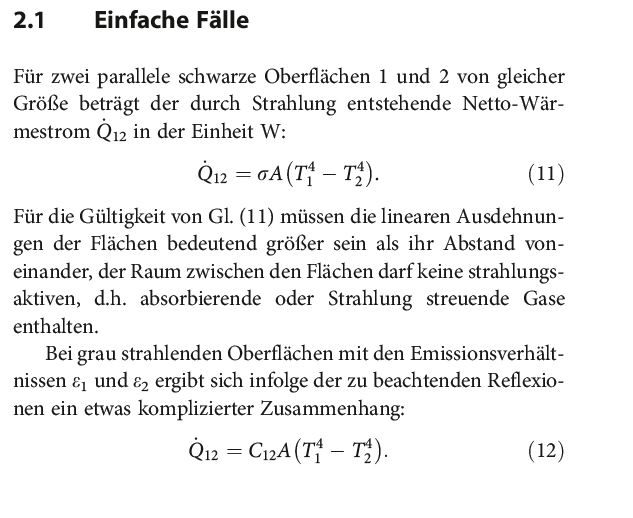

In [14]:
display.Image("https://raw.githubusercontent.com/flauhoff/Jupyter_test/main/F_12_Strahlung.png")
# VDI Wärmeatlas S. 1089

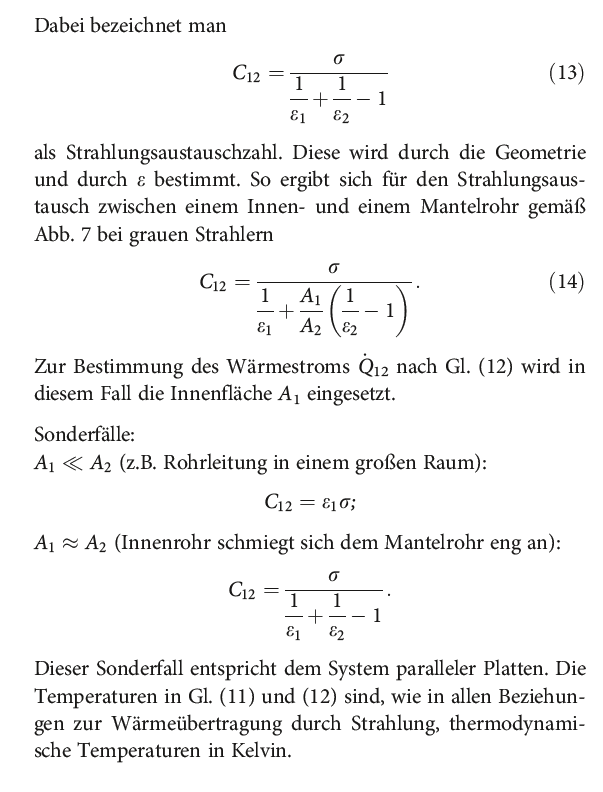

In [15]:
display.Image("https://raw.githubusercontent.com/flauhoff/Jupyter_test/main/F_13_%20Faktor_Strahlung.png")
# VDI Wärmeatlas S. 1099

## Fazit

Die Oberflächentemperatur der Widerstände erhöht sich um 49°C. Im Versuch entsteht nach einer Betriebsdauer 100 min eine Differenztemperatur von 42°C. Das kommt der Berechnung schon recht Nahe. Durch die hohe Wärmekapazität der Aluminiumplatten stellt sich erst nach sehr langer Betriebsdauer ein stationärer Zustand ein. 

Im realen Prüfprozess spielt also eine Erwärmung des Prüfstands keine Rolle. Erst wenn der Prüfstand zu Versuchszwecken in der Entwicklung verwendet wird, können sich Messabweichungen ergeben welche hingenommen werden. 

Ein sicherer Betrieb der Widerstände ist bis zu 200°C zugelassen. 